# Perceptrón: Caso práctico II

## Dataset

La base de datos del MNIST (base de datos modificada del Instituto Nacional de Normas y Tecnología) es una gran base de datos de dígitos manuscritos que se utiliza comúnmente para el entrenamiento de diversos sistemas de procesamiento de imágenes. La base de datos también se utiliza ampliamente para el entrenamiento y el ensayo en el campo del aprendizaje automático. Se creó "remezclando" las muestras de los conjuntos de datos originales del NIST. Los creadores consideraron que, dado que el conjunto de datos de capacitación del NIST fue tomado de los empleados de la Oficina del Censo de los Estados Unidos, mientras que el conjunto de datos de prueba fue tomado de los estudiantes de secundaria de los Estados Unidos, no era muy adecuado para los experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para que encajaran en un cuadro delimitador de 28x28 píxeles, lo que introdujo niveles de escala de grises.

La base de datos del MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba. La mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de pruebas del NIST.Los creadores originales de la base de datos mantienen una lista de algunos de los métodos probados en ella. En su papel original, utilizan una máquina de soporte vectorial para obtener una tasa de error del 0,8%. En 2017 se ha publicado un conjunto de datos ampliado similar al MNIST llamado EMNIST, que contiene 240.000 imágenes de entrenamiento y 40.000 imágenes de prueba de dígitos y caracteres escritos a mano.

## Enunciado

En este ejercicio práctico vamos a utilizar el Perceptrón para solucionar un problema más complejo que el anterior. En este caso, nuestro OBJETIVO será clasificar un conjunto de imágener con base al número que se muestra en las mismas.

## 1. Lectura del conjunto de datos

In [1]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

# Añadimos as_frame=False para forzar la devolución de un array
mnist = fetch_openml('mnist_784',  as_frame=False)

In [2]:
# Mostramos todos los valores dentro de "mnist"
# Cada array es una imagen
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
# Sus axis seran de 784 dimensiones horizontales y 70,000 dimensiones verticales
28*28

784

## 2. Visualización del conjunto de datos

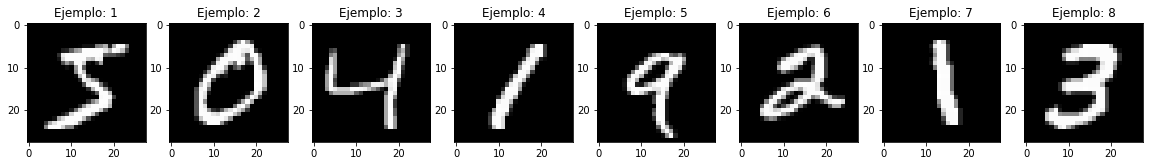

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

# Imaginalo como un bucle de post individuales de wordpress
# Imagenes de la  1 a la 8.
for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    # Estetica de la visualización
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    # Poner etiqueta superior
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [8]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

# Toma la BD creada con anterioridad y la agrega a pandas, pandas le asigna columnas y filas numeradas
# En este caso seran de 784 x 70,000
df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. División del conjunto de datos

In [9]:
from sklearn.model_selection import train_test_split

# 10% de los datos se usaran para el conjunto de pruebas.
# Estos se almacenaran en "X_train" y "y_train"
#                                                     BD           Label      % de Pruebas
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)

In [10]:
print(len(X_test))
print(len(X_train))

7000
63000


## 4. Entrenamiento del algoritmo

In [12]:
from sklearn.linear_model import Perceptron

# IMPORTANTE: Existen 10 clases donde se pueden clasificar: 0,1,2,3,4,5,6,7,8,9
# Nuestro Perceptron estara formado por 10 neuronas en la output layer

clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)
# Usa el 90% de los datos para entrenar al algoritmo y asi ajustar los pesos
# Busca los parametros adecuados para w1, w2, etc...
clf.fit(X_train, y_train)

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

In [17]:
# Tendremos 784 input feturing
# 10 neuronas
# 10 bias.
# Se tienen que ajustar 7850 parametros (W1, W2, etc...)
784 * 10 + 10

7850

In [19]:
# Número de parámetros que forman el modelo
# Pesos
clf.coef_.shape

(10, 784)

In [26]:
# Parámetros bias/intercept
# Número de Bias dentro de la output layer (un bias por cada neurona)
len(clf.intercept_)

10

In [25]:
# Valor de Bias dentro de cada neurona
clf.intercept_

array([ -2764.,   -460.,  -1285.,  -2542.,   -760.,   1456.,  -2005.,
         -300., -10612.,  -4230.])

## 5. Predicción con el conjunto de pruebas

In [27]:
# Realizamos la predicción con el conjunto de datos de prueba
y_pred = clf.predict(X_test)

In [31]:
len(y_pred)

7000

In [30]:
y_pred
# Tiene una etiqueta por cada uno de los valore que se le ha pasado
# Son los valores en las eiquetas (0,1,2...,9)

array(['4', '5', '8', ..., '0', '6', '6'], dtype='<U1')

In [29]:
# Mostramos el f1_score resultante de la clasificación
# "F1_score" es una metrica de sklearn
from sklearn.metrics import f1_score

# Se compara que tal la prediccion(y_pred) contra las etiquetas(y_test)
f1_score(y_test, y_pred, average="weighted")

0.8893870088318274

## 6. Mostrando las imagenes mal clasificadas

In [32]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

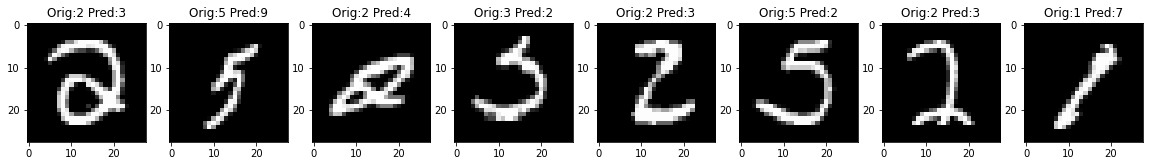

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()